# 인공지능(머신러닝)
## 지도학습: 문제, 정답을 알려주고 패턴 찾는 것
* 분류분석, 회귀분석
## 비지도학습: 문제만 알려주고 알고리즘이 알아서 패턴을 찾는 것
* 군집분석 

# 분류 분석의 대표적인 알고리즘 Tree 기반 모델
# 의사결정나무(Decision Tree)
* Decision Tree는 데이터를 분할해서 조건문처럼 분기해 나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속 질문을 던져서 분리
### 장점
* 직관적이고 해석 쉬움
* feature scaling(변수)이 필요 없음(MinMax, StandardScaler 사용을 하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석 할 수 있음
* 시각화가 쉽고 직관적
### 단점
* 과적합(overfitting)이 잘 일어남
* 최적 트리를 찾기 어렵고 시간이 오래 걸릴 수 있음



0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
2. 데이터 전처리(결측값처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로, 문자 -> 숫자, 상관관계)
4. Fearture Engineering(변수 선택, 새로운 특성 생성
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. 카테고리 변수의 더미 변수화(one-hot encoding)
8. sklearn에서 DecisionTreeClassifier를 불러와서 모델 훈련
9. test 세트를 모델에 넣어서 예측값 생성(pred)
10. accuracy_score(), classificatio_report()를 이용해서 모델의 성능 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 결측값 처리

In [9]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [11]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     891 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [13]:
data = data.drop(['PassengerId', 'Cabin'], axis=1)
data.head(2)
                  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# EDA

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='str')

In [15]:
cate_cols = data[['Survived', 'Pclass', 'Name', 'Sex','SibSp', 'Parch', 'Ticket', 'Embarked']]
num_cols = data[['Age', 'Fare']]

============================== Survived ==============================
Survived
0    549
1    342
Name: count, dtype: int64


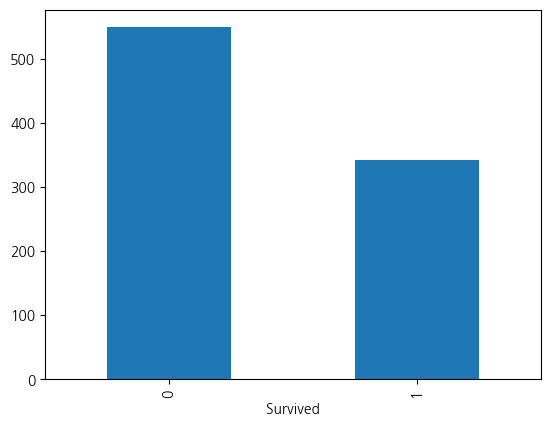


============================== Pclass ==============================
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


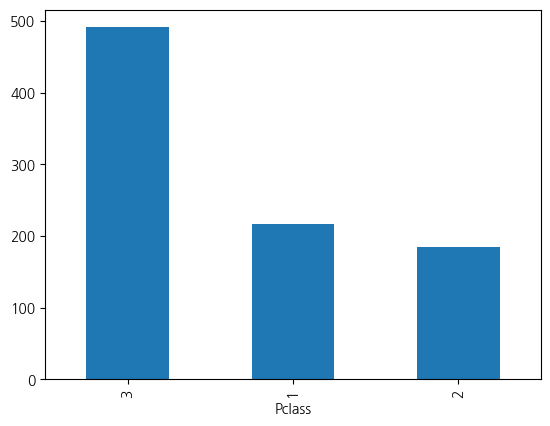


============================== Name ==============================
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64


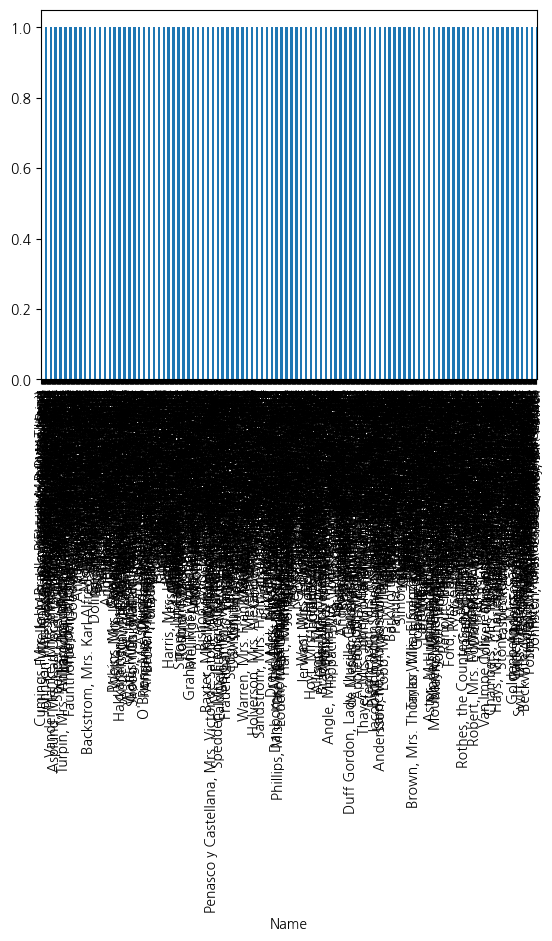


============================== Sex ==============================
Sex
male      577
female    314
Name: count, dtype: int64


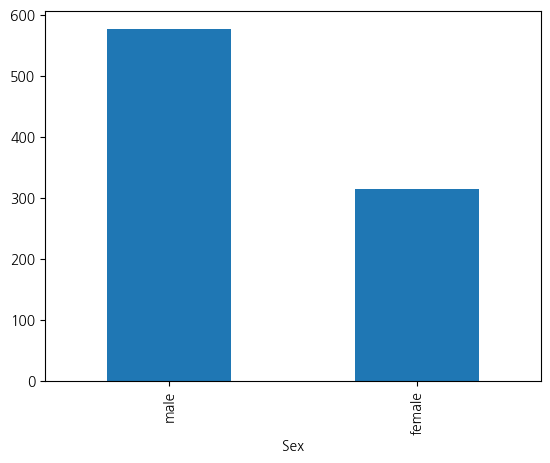


============================== SibSp ==============================
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


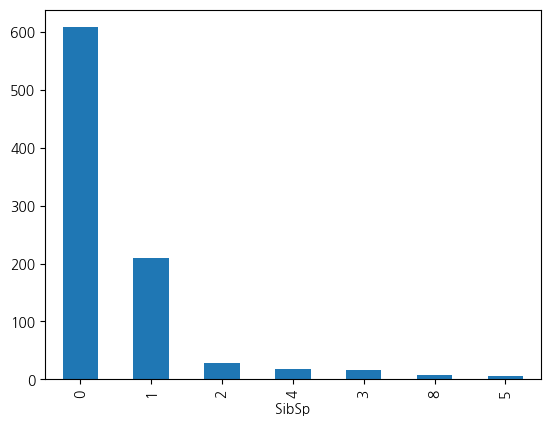


============================== Parch ==============================
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


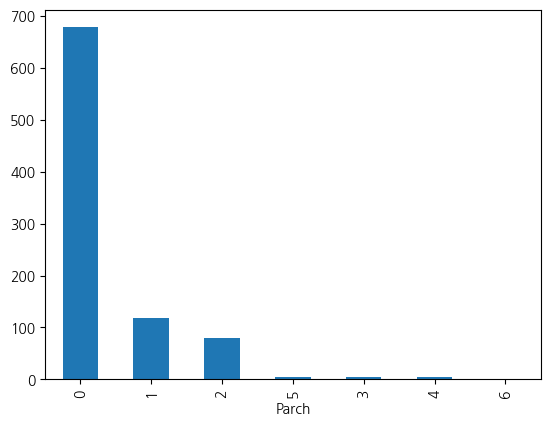


============================== Ticket ==============================
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
370376             1
Name: count, Length: 681, dtype: int64


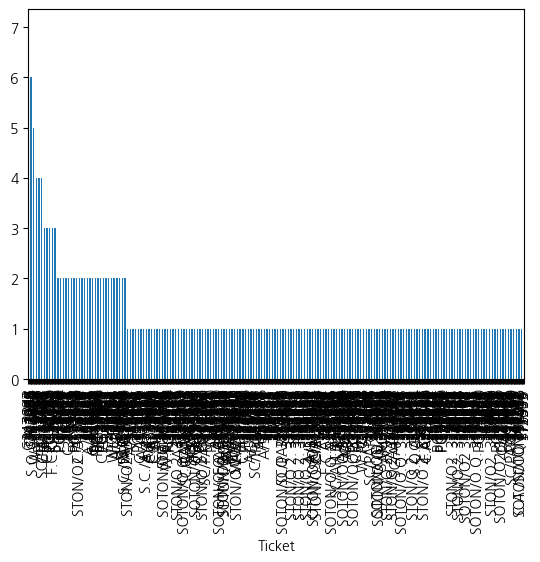


============================== Embarked ==============================
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


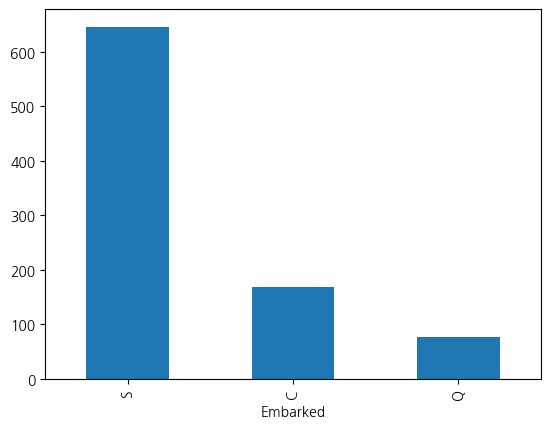

In [16]:
for col in cate_cols.columns:
    print("=" * 30, col, "=" * 30)
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()
    print()

============================== Age ==============================


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

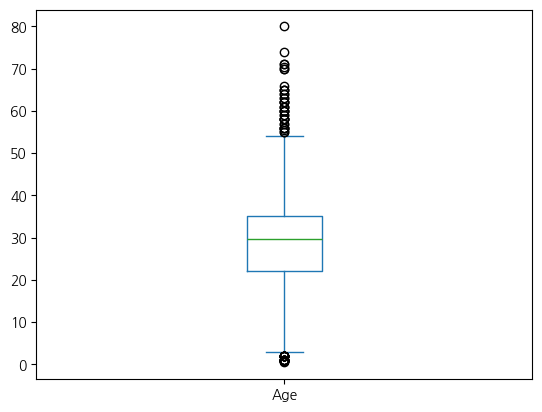

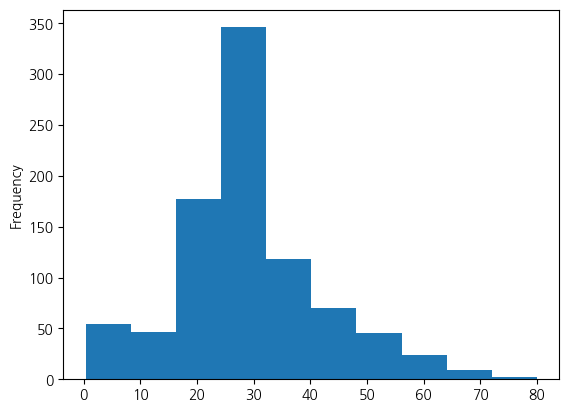

============================== Fare ==============================


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

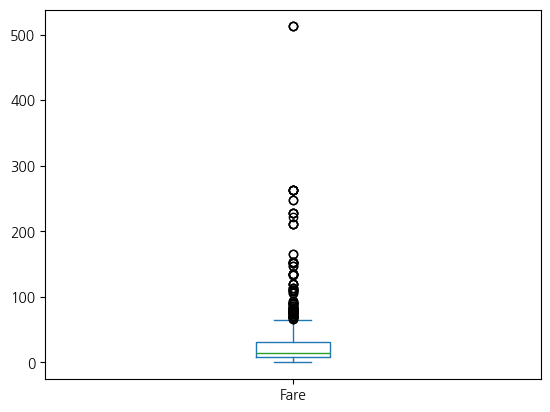

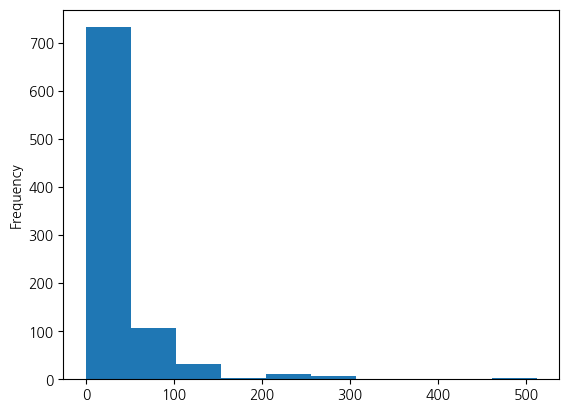

In [17]:
for col in num_cols.columns:
    print("=" * 30, col, "=" * 30)
    display(num_cols[col].describe())
    num_cols[col].plot(kind='box')
    plt.show()
    num_cols[col].plot(kind='hist')
    plt.show()

# groupby로 종속변수와 독립변수와의 관계 찾기

In [19]:
data[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
for col in data.columns[1:]:
    print("=" * 30, col, "=" * 30)
    display(data[['Survived', col]].groupby(col).mean())
    print()

============================== Pclass ==============================


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363



============================== Name ==============================


,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0



============================== Sex ==============================


,Survived
Sex,
female,0.742038
male,0.188908



============================== Age ==============================


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0



============================== SibSp ==============================


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000



============================== Parch ==============================


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000



============================== Ticket ==============================


,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000



============================== Fare ==============================


,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000



============================== Embarked ==============================


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


# sibsp + parch = family
# ticket, name 삭제

In [24]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [26]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


# 문자로 되어 있는 컬럼 숫자로 변환하기

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0


In [30]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
Fare        248
Embarked      3
family        9
dtype: int64

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [42]:
ohe_df = ohe.fit_transform(data[['Embarked']])
ohe_df = pd.DataFrame(ohe_df, index=data.index, columns=ohe.get_feature_names_out())
ohe_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [44]:
data = pd.concat([data, ohe_df], axis=1)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,S,1,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,C,1,1.0,0.0,0.0
2,1,3,0,26.0,7.9250,S,0,0.0,0.0,1.0
3,1,1,0,35.0,53.1000,S,1,0.0,0.0,1.0
4,0,3,1,35.0,8.0500,S,0,0.0,0.0,1.0


In [47]:
data = data.drop('Embarked', axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Fare,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,1,1.0,0.0,0.0


# 각 변수간 상관관계 보기

In [48]:
data.corr(method="spearman")

,Survived,Pclass,Sex,Age,Fare,family,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.339668,-0.543351,-0.039109,0.323736,0.165463,0.168240,0.003650,-0.149683
Pclass,-0.339668,1.000000,0.135775,-0.308875,-0.688032,-0.075698,-0.220995,0.229763,0.049011
Sex,-0.543351,0.135775,1.000000,0.067809,-0.259593,-0.292035,-0.082853,-0.074115,0.119224
Age,-0.039109,-0.308875,0.067809,1.000000,0.118847,-0.186465,0.024368,0.002690,-0.023040
Fare,0.323736,-0.688032,-0.259593,0.118847,1.000000,0.528907,0.204104,-0.232149,-0.032712
family,0.165463,-0.075698,-0.292035,-0.186465,0.528907,1.000000,0.051652,-0.082497,0.006667
Embarked_C,0.168240,-0.220995,-0.082853,0.024368,0.204104,0.051652,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.229763,-0.074115,0.002690,-0.232149,-0.082497,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.049011,0.119224,-0.023040,-0.032712,0.006667,-0.782742,-0.499421,1.000000


<Axes: >

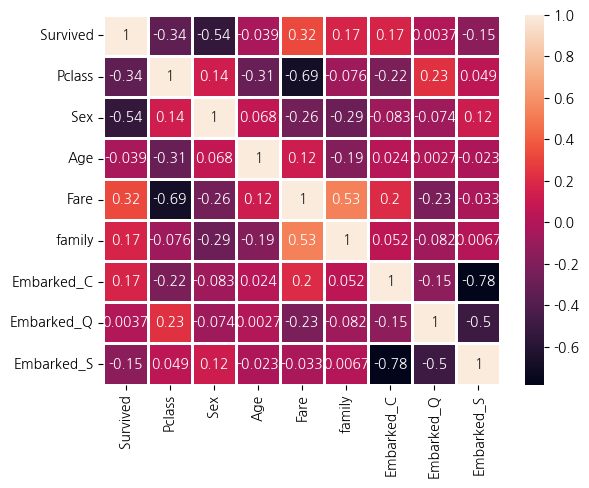

In [49]:
sns.heatmap(data.corr(method="spearman"), annot=True, linewidths=1)

In [51]:
data = data.drop('Fare', axis=1)
data.head()

,Survived,Pclass,Sex,Age,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0.0,0.0,1.0
1,1,1,0,38.0,1,1.0,0.0,0.0
2,1,3,0,26.0,0,0.0,0.0,1.0
3,1,1,0,35.0,1,0.0,0.0,1.0
4,0,3,1,35.0,0,0.0,0.0,1.0


# 나이 컬럼 구간화

In [54]:
data['Age'] = pd.cut(data['Age'],
       bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       right= False,
       labels= ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80'])

In [55]:
data.head(2)

,Survived,Pclass,Sex,Age,family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,20s,1,0.0,0.0,1.0
1,1,1,0,30s,1,1.0,0.0,0.0


In [58]:
data = pd.get_dummies(data, columns=['Age'])
data.head()

,Survived,Pclass,Sex,family,Embarked_C,Embarked_Q,Embarked_S,Age_under10s,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80
0,0,3,1,1,0.0,0.0,1.0,False,False,True,False,False,False,False,False,False
1,1,1,0,1,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False
2,1,3,0,0,0.0,0.0,1.0,False,False,True,False,False,False,False,False,False
3,1,1,0,1,0.0,0.0,1.0,False,False,False,True,False,False,False,False,False
4,0,3,1,0,0.0,0.0,1.0,False,False,False,True,False,False,False,False,False


# 종속변수 독립변수 분리

In [59]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# 훈련/테스트데이터 분리 홀드아웃

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 의사결정나무 불러와서 분석하기

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.pred